In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time
import torch

import sbibm

In [2]:
# Plotting settings
plt.style.use("plotting_settings.mplstyle")
# Colorblind color palette
colors = [
    "#377eb8",
    "#ff7f00",
    "#4daf4a",
    "#f781bf",
    "#a65628",
    "#984ea3",
    "#999999",
    "#e41a1c",
    "#dede00",
]

# Fix seed for figures.
seed = 223174  # torch.randint(1000000, (1,))
torch.manual_seed(seed)
print(f"seed {seed}")

seed 223174


## Load DDM task from `sbibm`

In [3]:
task = sbibm.get_task("ddm")
prior = task.get_prior_dist()
simulator = task.get_simulator(seed=seed)  # Passing the seed to Julia.

In [4]:
# Load pretrained NLE model
with open("mnle-lan-comparison/models/mnle_n100000_new_seed205898.p", "rb") as fh:
    mnle = pickle.load(fh)["estimator"]

seed 765789


/home/janfb/.local/lib/python3.7/site-packages/julia/core.py:691: FutureWarning: Accessing `Julia().<name>` to obtain Julia objects is deprecated.  Use `from julia import Main; Main.<name>` or `jl = Julia(); jl.eval('<name>')`.
  FutureWarning,
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: open-sans
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: open-sans
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: open-sans


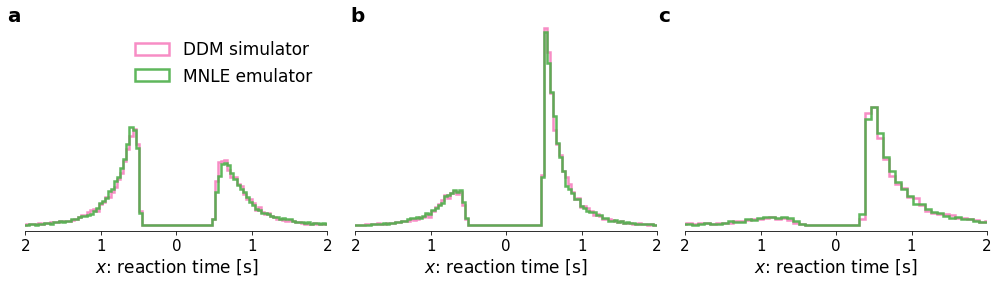

In [5]:
num_examples = 3
show_density = True
fig, ax = plt.subplots(1, num_examples, figsize=(14, 4), sharex=False, sharey=False)
seed = 765789  # torch.randint(1000000, (1,))
torch.manual_seed(seed)
print(f"seed {seed}")
alpha = 0.9

nbins = 150
num_samples = 10000
for i in range(num_examples):
    # Simulate
    tho = prior.sample((1,))
    #     tho[0, -1] = 0.2
    xo = simulator(tho.repeat(num_samples, 1))
    x_mnle = mnle.sample(tho, num_samples)
    x_mnle[x_mnle[:, 1] == 0, 0] *= -1
    x_mnle = x_mnle[:, 0]

    # Plotting
    plt.sca(ax if num_examples == 1 else ax[i])
    c1, bins, _ = plt.hist(
        xo.numpy(),
        bins=nbins,
        alpha=alpha,
        label="DDM simulator",
        color=colors[3],
        density=show_density,
        histtype="step",
        linewidth=2.5,
    )
    c2, _, _ = plt.hist(
        x_mnle.numpy(),
        bins=bins,
        alpha=alpha,
        label="MNLE emulator",
        color=colors[2],
        density=show_density,
        histtype="step",
        linewidth=2.5,
    )

    if i == 0:
        plt.legend()

    # fix yticks.
    maxcount = round(max(c1.max(), c2.max()), 1)
    if maxcount % 2:
        maxcount += 1
    plt.ylim(0, maxcount)
    plt.yticks(np.linspace(0, maxcount, 3))

    # xticks
    plt.xlabel("$x$: reaction time [s]")
    plt.xticks([-2, -1, 0, 1, 2], [2, 1, 0, 1, 2])
    plt.xlim(-2, 2)

    # yticks
    plt.gca().spines.left.set_visible(False)
    plt.ylim(-0.1, 3.2)
    plt.yticks([])

y1 = 0.95
x1 = 0.005
dx = 0.34
weight = "bold"
fontsize = 20
fig.text(x1, y1, "a", fontsize=fontsize, fontweight=weight)
fig.text(x1 + dx, y1, "b", fontsize=fontsize, fontweight=weight)
fig.text(x1 + 1.9 * dx, y1, "c", fontsize=fontsize, fontweight=weight)

plt.tight_layout()
fig.savefig("figures/FigureA4-MNLE-synthetic-data.png", dpi=300, bbox_inches="tight")
fig.savefig("figures/Figure 2--figure supplement 1.pdf", dpi=400, bbox_inches="tight");